### Student Details

Student Name: Cathaoir Agnew

Student ID: 16171659


# Task 2: scikit learn

In [1]:
# import dependencies
import numpy as np

1.	Read the iris dataset using Pandas (ref Option 2 above)
2.	Extract the Iris-setosa and Iris-verginica samples only
3.	Extract the petal length and petal width. These shall be our features.

In [2]:
# The data is in a structured way, there is 50 datapoints for each flower 
# 150 data points, 50 for each of the 3 flowers
# 5 columns, there is 4 measurements of flower and last column is flower class

#print(df[0:50])     - Iris-setosa  
#print(df[50:100])   - Iris-versicolor
#print(df[100:150])  - Iris-virginica

#print(df.shape)

In [3]:
import pandas as pd
df = pd.read_csv('iris_data.csv', header=0)

# quick glance at data
print(df.head())
print("")
print(df.columns)
print("")
# unique values in the class column
print(df.iloc[:,4].unique())

# Because of how data is stored, first 100 data points are of type Iris-setosa & Iris-versicolor

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

   sepal_length   sepa_width   petal_length   petal_width        class
0           5.1          3.5            1.4           0.2  Iris-setosa
1           4.9          3.0            1.4           0.2  Iris-setosa
2           4.7          3.2            1.3           0.2  Iris-setosa
3           4.6          3.1            1.5           0.2  Iris-setosa
4           5.0          3.6            1.4           0.2  Iris-setosa

Index(['sepal_length', ' sepa_width', ' petal_length', ' petal_width',
       ' class'],
      dtype='object')

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


4.	Plot the dataset as a scatter plot with the two Iris types shown as different colours

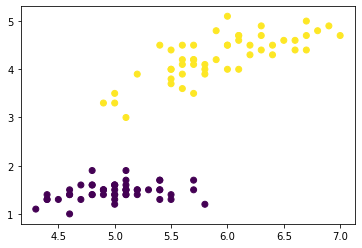

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);

5.	Use the perceptron in sklearn.linear_model to train on the Iris data previously used. Set verbose = 1; have a look at the epochs, it converges very quickly?

In [5]:
# So as not to confuse with our previously defined Perceptron class
from sklearn.linear_model import Perceptron as Perceptron 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

# initialize
ppn = Perceptron(verbose = True, n_iter_no_change = 3)

# fit to data
ppn.fit(X_train , y_train)

# predict
y_preds = ppn.predict(X_test)

# Printing out the accuracy score on the X test 
print("Perception accuracy (in %):", accuracy_score(y_test , y_preds)*100)

-- Epoch 1
Norm: 6.44, NNZs: 2, Bias: -1.000000, T: 67, Avg. loss: 1.649552
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6.44, NNZs: 2, Bias: -1.000000, T: 134, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 6.44, NNZs: 2, Bias: -1.000000, T: 201, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 6.44, NNZs: 2, Bias: -1.000000, T: 268, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.44, NNZs: 2, Bias: -1.000000, T: 335, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 5 epochs took 0.00 seconds
Perception accuracy (in %): 100.0


# Reason for fast convergence
Looking at the scatter plot above, the type of the flower is extremely identifiable from sepal length & petal length. As there is no overlaps, a linear classifier would perfectly seperate these 2 flower types.  Convergence of the perceptron is only guaranteed if the two classes are linearly separable. We can see from the scatterplot above, that the flower type is linearly seperable, and so the perceptron model is converging on a perfect accuracy (0 misclassifications), usually within 1 iteration/epoch.

6.	Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case

In [6]:
# sepal length and petal length
print(df.iloc[0:100, [0,2]].describe())

       sepal_length   petal_length
count    100.000000     100.000000
mean       5.471000       2.862000
std        0.641698       1.448565
min        4.300000       1.000000
25%        5.000000       1.500000
50%        5.400000       2.450000
75%        5.900000       4.325000
max        7.000000       5.100000


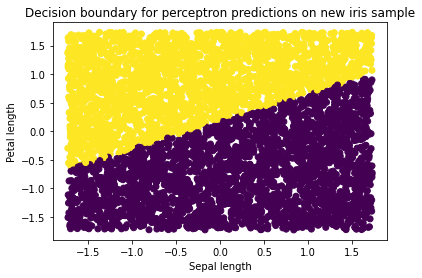

In [7]:
# creating 5000 new random samples
import random 
import pandas as pd 

# sepal length and petal length
new_sample_sepal_length = []
new_sample_petal_length = []

for i in range(5000):
    # these values used below were from min/max of each flower type sepal & petal length.
    new_sample_sepal_length.append(random.uniform(4.3,7))
    new_sample_petal_length.append(random.uniform(1,5.1))
    
# feature scaling, as questions asked for this.
sepal_avg = np.mean(new_sample_sepal_length)
sepal_std = np.std(new_sample_sepal_length)

petal_avg = np.mean(new_sample_petal_length)
petal_std = np.std(new_sample_petal_length)

new_sample_sepal_length_scaled =  (new_sample_sepal_length - sepal_avg) / sepal_std
new_sample_petal_length_scaled =  (new_sample_petal_length - petal_avg) / petal_std

rand_sample_scaled = list(zip(new_sample_sepal_length_scaled, new_sample_petal_length_scaled)) 
predictions_scaled = ppn.predict(rand_sample_scaled)

plt.scatter(new_sample_sepal_length_scaled, new_sample_petal_length_scaled , c= predictions_scaled )
plt.title('Decision boundary for perceptron predictions on new iris sample')
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.show()

# Plot of no scaling of the features for the predictions

There is a slight differenece in the boundary decision in the plots across scaled v non-scaled. 

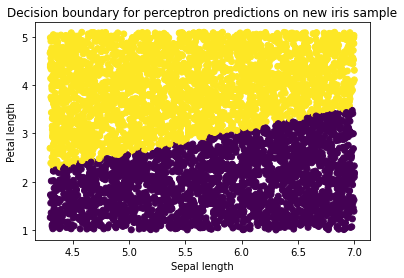

In [8]:
rand_sample = list(zip(new_sample_sepal_length, new_sample_petal_length)) 
predictions = ppn.predict(rand_sample)

plt.scatter(new_sample_sepal_length, new_sample_petal_length , c= predictions )
plt.title('Decision boundary for perceptron predictions on new iris sample')
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.show()